# 1st Homework

## András Simon

---

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import wave
import pylab
import bs4
import urllib.request
from collections import Counter

# 1)

### Loading 5 images

In [2]:
imageList = []

for filename in os.listdir("./Images/"):
    imageList.append(plt.imread("./Images/"+filename).copy())

### Check the shape of the loaded images

In [3]:
for image in imageList:
    print(image.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


### Showing and printing the content of the channels of the images 

Image: 0
Channel: 0
[[140 139 138 ... 103 103 103]
 [139 138 137 ... 103 103 103]
 [137 137 137 ... 103 103 103]
 ...
 [225 165 169 ...  51  41  64]
 [191 164 155 ...  12  15  53]
 [162 169 147 ...  38  50  90]]


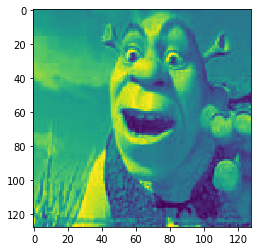

Channel: 1
[[152 151 150 ... 111 110 110]
 [151 150 149 ... 111 111 110]
 [149 149 149 ... 111 111 111]
 ...
 [214 148 147 ...  40  32  56]
 [183 150 134 ...   2   7  46]
 [157 158 129 ...  27  41  82]]


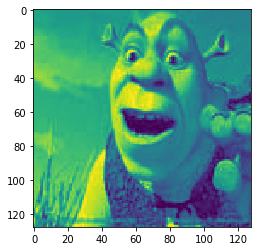

Channel: 2
[[210 209 208 ... 194 198 198]
 [209 208 207 ... 194 196 198]
 [207 207 207 ... 192 194 194]
 ...
 [160 102 100 ...  18   1  20]
 [100  79  67 ...   0   0  20]
 [ 55  69  47 ...  21  26  63]]


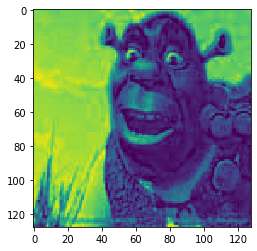

Image: 1
Channel: 0
[[135 144 136 ... 142 143 137]
 [141 139 134 ... 145 147 149]
 [152 144 139 ... 150 156 162]
 ...
 [140 133 130 ... 188 160 140]
 [137 139 140 ... 148 136 147]
 [141 133 138 ... 143 141 142]]


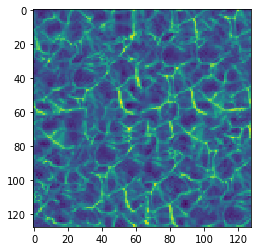

Channel: 1
[[175 187 183 ... 191 189 184]
 [181 181 180 ... 187 187 189]
 [192 186 185 ... 188 191 195]
 ...
 [184 180 177 ... 225 199 179]
 [180 183 187 ... 183 172 184]
 [183 175 181 ... 178 177 177]]


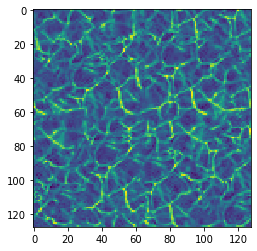

Channel: 2
[[224 238 235 ... 250 249 240]
 [232 231 232 ... 237 238 238]
 [243 236 237 ... 227 231 236]
 ...
 [233 226 219 ... 255 242 222]
 [231 232 233 ... 225 220 236]
 [241 233 236 ... 220 227 233]]


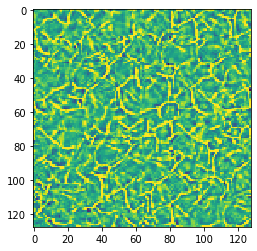

Image: 2
Channel: 0
[[147 147 144 ... 196 199 201]
 [141 143 143 ... 198 201 203]
 [137 141 143 ... 200 204 205]
 ...
 [ 89 101  93 ...   1  10  18]
 [103 111 109 ...   4   8  14]
 [ 66  78  85 ...   7   8   7]]


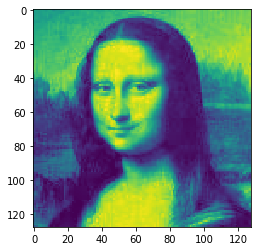

Channel: 1
[[145 145 142 ... 183 186 188]
 [139 141 141 ... 185 188 190]
 [133 137 140 ... 188 192 193]
 ...
 [ 68  82  79 ...   1   9  17]
 [ 77  90  91 ...   3   7  11]
 [ 40  54  67 ...   6   5   4]]


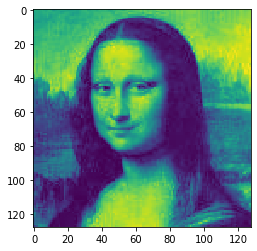

Channel: 2
[[ 96  96  93 ... 141 144 146]
 [ 90  92  90 ... 141 144 146]
 [ 85  89  89 ... 140 144 145]
 ...
 [ 47  52  34 ...   0   5  13]
 [ 62  63  45 ...   0   2   6]
 [ 27  30  21 ...   2   0   0]]


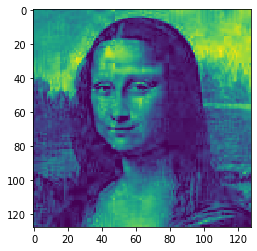

Image: 3
Channel: 0
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


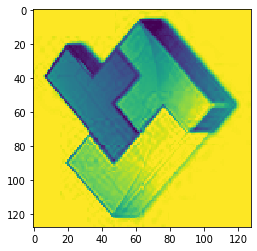

Channel: 1
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


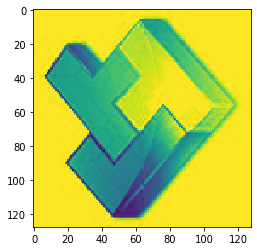

Channel: 2
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


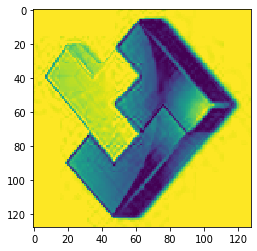

Image: 4
Channel: 0
[[123 121 119 ... 117 120 122]
 [123 121 120 ... 117 119 121]
 [123 122 121 ... 117 119 120]
 ...
 [130 128 124 ... 115 117 119]
 [123 123 124 ... 115 117 118]
 [115 118 124 ... 114 116 117]]


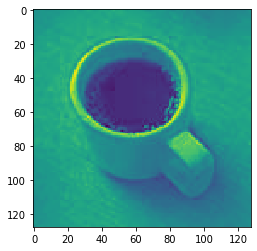

Channel: 1
[[104 102 100 ...  97 100 102]
 [104 102 101 ...  97  99 101]
 [104 103 102 ...  97  99 100]
 ...
 [105 103  99 ...  95  97  99]
 [ 98  98  99 ...  95  97  98]
 [ 90  93  99 ...  94  96  97]]


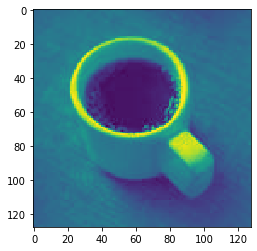

Channel: 2
[[90 88 86 ... 88 91 93]
 [90 88 87 ... 88 90 92]
 [90 89 88 ... 88 90 91]
 ...
 [98 96 92 ... 86 88 90]
 [91 91 92 ... 86 88 89]
 [83 86 92 ... 85 87 88]]


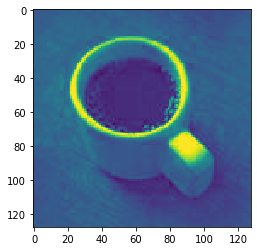

In [4]:
for i, image in enumerate(imageList):
    print(f"Image: {i}")
    for channel in range(3):
        print(f"Channel: {channel}")
        print(image[:, :, channel])
        plt.imshow(image[:, :, channel])
        plt.show()

# 2)

### Saving the means and stds of the images

In [5]:
std_list = []
mean_list = []

for image in imageList:
    channel_std = []
    channel_mean = []
    for channel in range(3):
        channel_std.append(image[:, :, channel].std())
        channel_mean.append(image[:, :, channel].mean())
    std_list.append(channel_std)
    mean_list.append(channel_mean)

In [6]:
std_list

[[53.49955847147989, 57.316989689027466, 85.84223121315243],
 [19.48767031606431, 15.063479007739296, 10.167946568163353],
 [80.5523433604824, 70.67196937542505, 44.404161965891134],
 [70.2707791938346, 56.535646367516776, 89.40162298563507],
 [37.237028434604866, 39.07902131087997, 36.80093055651686]]

In [7]:
mean_list

[[134.87353515625, 134.225341796875, 112.05804443359375],
 [156.10272216796875, 194.35748291015625, 236.5908203125],
 [114.24847412109375, 99.0093994140625, 59.084228515625],
 [204.6951904296875, 214.20294189453125, 187.44744873046875],
 [117.7965087890625, 108.98046875, 98.29364013671875]]

### Creating standardized images

In [8]:
standardizedImageList = []

for i, image in enumerate(imageList):
    new_image = image.copy().astype("float")
    for channel in range(3):
        new_image[:, :, channel] = (new_image[:, :, channel] - mean_list[i][channel]) / std_list[i][channel]
    standardizedImageList.append(new_image)

### Check the means and stds of the standardized images

In [9]:
for i, image in enumerate(standardizedImageList):
    print(f"Image: {i}")
    for channel in range(3):
        print(f"Channel: {channel}")
        print(f"Mean: {image[:, :, channel].mean()}\nStd: {image[:, :, channel].std()}", '\n')

Image: 0
Channel: 0
Mean: 0.0
Std: 0.9999999999999999 

Channel: 1
Mean: 1.3877787807814457e-17
Std: 1.0 

Channel: 2
Mean: -1.3877787807814457e-17
Std: 1.0 

Image: 1
Channel: 0
Mean: -5.204170427930421e-18
Std: 1.0 

Channel: 1
Mean: 7.806255641895632e-18
Std: 1.0 

Channel: 2
Mean: 4.336808689942018e-19
Std: 0.9999999999999999 

Image: 2
Channel: 0
Mean: 0.0
Std: 1.0 

Channel: 1
Mean: 0.0
Std: 0.9999999999999999 

Channel: 2
Mean: 0.0
Std: 1.0 

Image: 3
Channel: 0
Mean: -2.7755575615628914e-17
Std: 1.0 

Channel: 1
Mean: 4.163336342344337e-17
Std: 0.9999999999999999 

Channel: 2
Mean: -3.469446951953614e-17
Std: 1.0 

Image: 4
Channel: 0
Mean: 0.0
Std: 1.0 

Channel: 1
Mean: 6.938893903907228e-18
Std: 0.9999999999999999 

Channel: 2
Mean: -1.3877787807814457e-17
Std: 1.0 



There are small numerical inaccuracies in the results, but all the means are almost 0 and all the stds are almost 1.

# 3)

### Plotting the spectogram of a music

Code source: https://dzone.com/articles/generating-audio-spectrograms

In [10]:
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)

In [11]:
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

/home/simonand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/home/simonand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.
/home/simonand/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7725: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


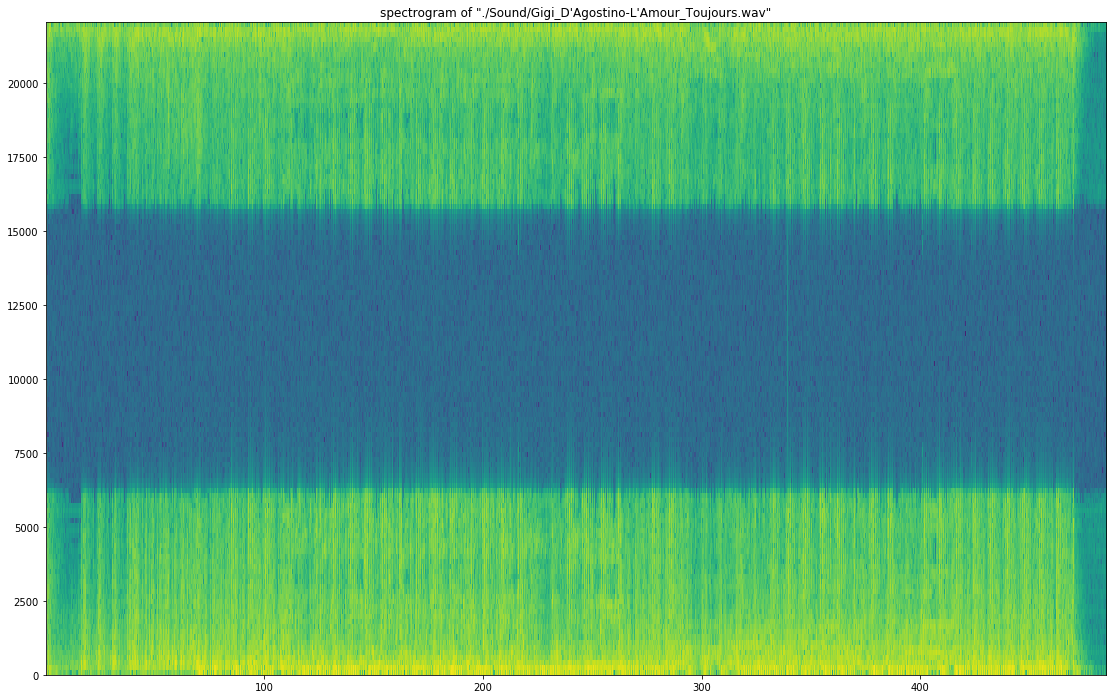

In [12]:
wav_file = "./Sound/Gigi_D'Agostino-L'Amour_Toujours.wav"
graph_spectrogram(wav_file)

# 4)

### Downloading the text of a website

In [13]:
link = "https://en.wikipedia.org/wiki/Deep_learning"

webpage = str(urllib.request.urlopen(link).read())
soup = bs4.BeautifulSoup(webpage)
text = soup.get_text()

text

'b\'\\n\\n\\n\\nDeep learning - Wikipedia\\ndocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"59769ca0-3684-4dc2-b360-762000d011ec","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Deep_learning","wgTitle":"Deep learning","wgCurRevisionId":980693328,"wgRevisionId":980693328,"wgArticleId":32472154,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","CS1 errors: missing periodical","CS1 maint: archived copy as title","Articles with short description","Short description matches Wikidata","Wikipedia references cleanup from June 2020","All articles needing references cleanup",\\n"Articles co

### Counting the caracters

In [14]:
counts = Counter(text)

counts_list = []

for key, value in counts.items():
    temp = [key, value]
    counts_list.append(temp)

counts_list = [pair for pair in counts_list if pair[0].isalpha()]  # using only the letters
counts_list = sorted(counts_list, key=lambda x: x[1], reverse=True)

counts_list[:10]

[['e', 8985],
 ['n', 7082],
 ['a', 5973],
 ['i', 5767],
 ['t', 5634],
 ['o', 5067],
 ['r', 5007],
 ['s', 4001],
 ['l', 3003],
 ['c', 2767]]

### Plotting the histogram

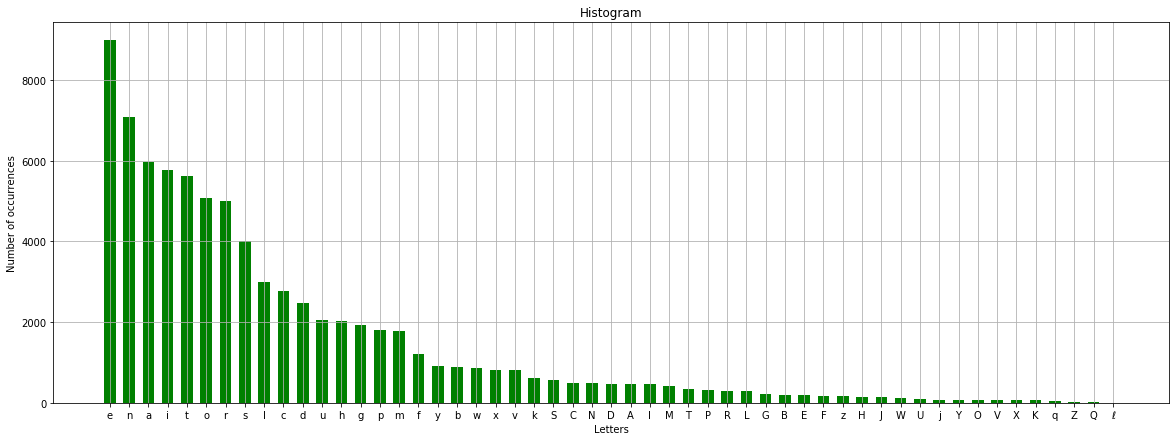

In [15]:
fig, ax = plt.subplots(figsize=(20, 7))

ax.bar([i[0] for i in counts_list], [i[1] for i in counts_list], width=0.6, color='g')

ax.grid(True, linestyle='-')

ax.set_title('Histogram')
ax.set_xlabel('Letters')
ax.set_ylabel('Number of occurrences')

plt.show()